<a href="https://colab.research.google.com/github/subhamghimire/Machine-Learning/blob/master/finance_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np

In [0]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 1)

In [0]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [0]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

In [0]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [0]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [0]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [23]:
bank_stocks.head()

Bank Ticker        BAC                        ...        WFC                       
Stock Info        High        Low       Open  ...      Close      Volume  Adj Close
Date                                          ...                                  
2010-01-04   15.750000  15.120000  15.240000  ...  27.320000  39335700.0  20.816917
2010-01-05   16.209999  15.700000  15.740000  ...  28.070000  55416000.0  21.388395
2010-01-06   16.540001  16.030001  16.209999  ...  28.110001  33237000.0  21.418875
2010-01-07   17.190001  16.510000  16.680000  ...  29.129999  61649000.0  22.196077
2010-01-08   17.100000  16.629999  16.980000  ...  28.860001  35508700.0  21.990347

[5 rows x 36 columns]

In [26]:
# for tick in tickers:
# print(tick,bank_stocks[tick]['Close'].max())
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     35.520000
C       80.080002
GS     273.380005
JPM    139.399994
MS      58.910000
WFC     65.930000
dtype: float64

In [0]:
returns = pd.DataFrame()

In [28]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.032505,0.038235,0.017680,0.019370,0.036558,0.027452
2010-01-06,0.011728,0.031162,-0.010673,0.005494,0.012796,0.001425
2010-01-07,0.032947,0.002747,0.019568,0.019809,0.014484,0.036286
2010-01-08,-0.008860,-0.016438,-0.018911,-0.002456,-0.020352,-0.009269


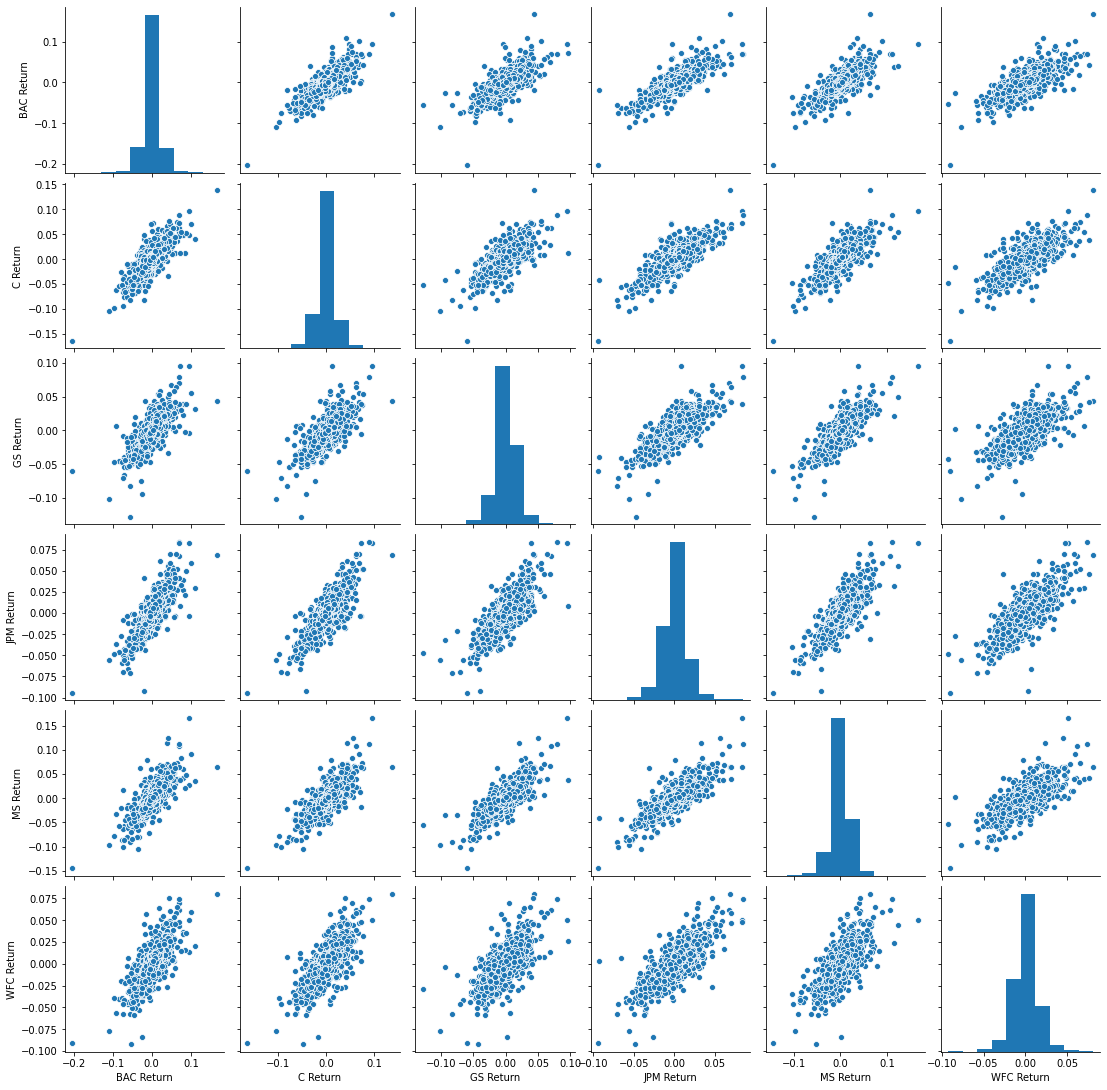

In [29]:
import seaborn as sns
sns.pairplot(returns[1:])

In [30]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2011-08-08
C Return     2011-08-08
GS Return    2010-04-16
JPM Return   2011-08-08
MS Return    2011-08-08
WFC Return   2018-02-05
dtype: datetime64[ns]

In [34]:
returns.std()

BAC Return    0.020466
C Return      0.019520
GS Return     0.016418
JPM Return    0.015781
MS Return     0.020769
WFC Return    0.015169
dtype: float64

In [0]:
import matplotlib.pyplot as plt

In [40]:
import plotly
import cufflinks as cf
cf.go_offline()

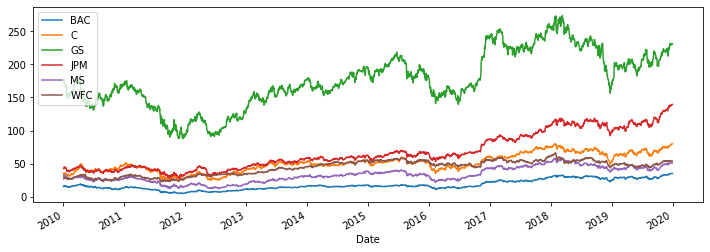

In [41]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

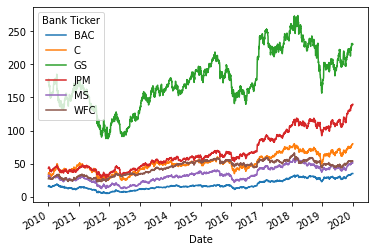

In [42]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [44]:
# plotly
import plotly.io as pio
pio.renderers.default = 'colab'
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

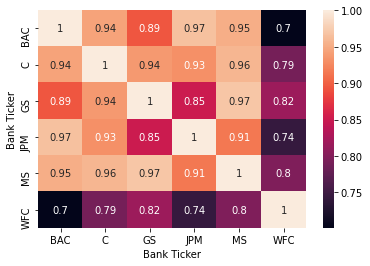

In [46]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

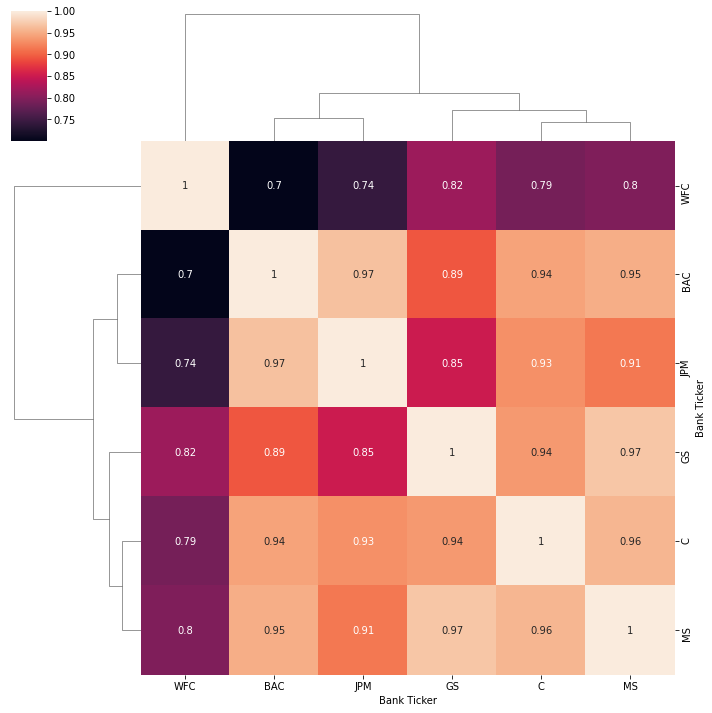

In [47]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [48]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')